# 1. Import Library

In [11]:
# Cell 1: Import library
import pandas as pd
from itertools import combinations
from collections import defaultdict, Counter


# 2. Data Transaksi

In [12]:
# Cell 2: Data transaksi
transactions = {
    1000: ['M', 'O', 'N', 'K', 'E', 'Y'],
    2000: ['D', 'O', 'N', 'K', 'E', 'Y'],
    4000: ['M', 'A', 'K', 'E'],
    5000: ['M', 'U', 'C', 'K', 'Y'],
    6000: ['C', 'O', 'O', 'K', 'I', 'E'],
    7000: ['D', 'O', 'N', 'M', 'O', 'N']
}
min_support = 5  # sesuai 80% dari 6 transaksi


# 3. APRORI METHOD

***3.1 Hitung 1-itemset dan support***

In [13]:
# Cell 3: Hitung frekuensi 1-itemset
all_items = []
for items in transactions.values():
    all_items.extend(items)

item_counts = Counter(all_items)
frequent_1_itemset = {item for item, count in item_counts.items() if count >= min_support}
print("Frequent 1-itemset:", frequent_1_itemset)


Frequent 1-itemset: {'K', 'O'}


***3.2 Generate 2-itemset dan supportnya***

In [14]:
# Cell 4: Hitung frekuensi 2-itemset
pair_counts = defaultdict(int)

for items in transactions.values():
    filtered = [item for item in items if item in frequent_1_itemset]
    for pair in combinations(sorted(set(filtered)), 2):
        pair_counts[pair] += 1

frequent_2_itemset = {pair: count for pair, count in pair_counts.items() if count >= min_support}
print("Frequent 2-itemset:", frequent_2_itemset)


Frequent 2-itemset: {}


***3.3. Confidence dari aturan asosiasi***

In [20]:
# Cell 5: Hitung confidence dari aturan asosiasi 2-itemset dengan pengecekan isi
def get_support(item, transactions):
    return sum(1 for trans in transactions.values() if item in trans)

if not frequent_2_itemset:
    print("Tidak ada frequent 2-itemset yang memenuhi minimum support.")
else:
    for (A, B), support_AB in frequent_2_itemset.items():
        support_A = get_support(A, transactions)
        support_B = get_support(B, transactions)

        conf_A_to_B = support_AB / support_A * 100
        conf_B_to_A = support_AB / support_B * 100

        print(f"{A} → {B} = {conf_A_to_B:.2f}%")
        print(f"{B} → {A} = {conf_B_to_A:.2f}%")


Tidak ada frequent 2-itemset yang memenuhi minimum support.


# 4. FP GROWTH

***4.1 Frekuensi dan filter item berdasarkan min support***

In [21]:
# Cell 6: Hitung frekuensi & filter item untuk FP-Growth
item_counts_fp = Counter()
for items in transactions.values():
    item_counts_fp.update(items)

frequent_items_fp = {item for item, count in item_counts_fp.items() if count >= min_support}
print("Frequent items FP-Growth:", frequent_items_fp)


Frequent items FP-Growth: {'K', 'O'}


***4.2 Transaksi berdasarkan urutan frekuensi***

In [22]:
# Cell 7: Urutkan item di tiap transaksi berdasarkan frekuensi global
sorted_items = sorted(frequent_items_fp, key=lambda x: item_counts_fp[x], reverse=True)

sorted_transactions = []
for items in transactions.values():
    filtered = [item for item in items if item in frequent_items_fp]
    ordered = sorted(filtered, key=lambda x: sorted_items.index(x))
    sorted_transactions.append(ordered)

print("Transaksi setelah diurutkan:", sorted_transactions)


Transaksi setelah diurutkan: [['O', 'K'], ['O', 'K'], ['K'], ['K'], ['O', 'O', 'K'], ['O', 'O']]


***4.3 Struktur FP-Tree***

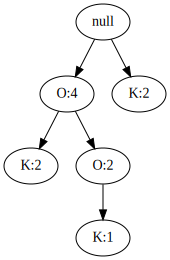

In [32]:
# Cell 8: Visualisasi FP-Tree langsung di layar (inline)
from graphviz import Digraph
from graphviz import Source  # untuk render inline di notebook

class TreeNode:
    def __init__(self, item, count=1):
        self.item = item
        self.count = count
        self.children = {}

    def increment(self):
        self.count += 1

def build_fp_tree(transactions):
    root = TreeNode("null")
    for transaction in transactions:
        current = root
        for item in transaction:
            if item in current.children:
                current.children[item].increment()
            else:
                current.children[item] = TreeNode(item)
            current = current.children[item]
    return root

def visualize_fp_tree(node, dot=None, parent_name="null"):
    if dot is None:
        dot = Digraph()
        dot.node("null", "null")  # root node

    for child_item, child_node in node.children.items():
        node_id = f"{child_node.item}_{id(child_node)}"
        label = f"{child_node.item}:{child_node.count}"

        dot.node(node_id, label)
        dot.edge(parent_name, node_id)

        visualize_fp_tree(child_node, dot, node_id)

    return dot

# Bangun dan tampilkan FP-Tree
fp_tree = build_fp_tree(sorted_transactions)
dot = visualize_fp_tree(fp_tree)

# Tampilkan langsung di notebook (bukan render ke file)
Source(dot)  # ini akan otomatis ditampilkan di output cell
from graphviz import Source

# Bangun dan tampilkan FP-Tree
fp_tree = build_fp_tree(sorted_transactions)
dot = visualize_fp_tree(fp_tree)

# ✅ Tampilkan langsung dalam cell
Source(dot.source)
